In [7]:
import sys
sys.path.append("../")

from pathlib import Path

# Importing classification algorithm abstraction and components to parameterize it.
from pysatl_cpd.core.algorithms.classification_algorithm import ClassificationAlgorithm
# Importing implementation of SVM classifier for CPD.
from pysatl_cpd.core.algorithms.classification.classifiers.svm import SVMClassifier
# Importing quality metric.
from pysatl_cpd.core.algorithms.classification.quality_metrics.classification.mcc import MCC
# Importing test statistic.
from pysatl_cpd.core.algorithms.classification.test_statistics.threshold_overcome import ThresholdOvercome
# Importing one of the scrubber implementations.
from pysatl_cpd.core.scrubber.linear import LinearScrubber
from pysatl_cpd.core.scrubber.data_providers import LabeledDataProvider
from pysatl_cpd.core.problem import CpdProblem
from pysatl_cpd.labeled_data import LabeledCpdData
# Importing shell of CPD algorithm.
from pysatl_cpd.cpd_solver import CpdSolver
# Importing generator of dataset.
from pysatl_cpd.generator.generator import ScipyDatasetGenerator
from pysatl_cpd.generator.saver import DatasetSaver

In [8]:
path_string = "./configs/test_config_exp.yml"
distributions_name = "exp"
saver = DatasetSaver(Path(), True)
# Generating datatset.

generated = ScipyDatasetGenerator().generate_datasets(Path(path_string), saver)
data, expected_change_points = generated[distributions_name]
print("Expected change points:", expected_change_points)

Expected change points: [200]


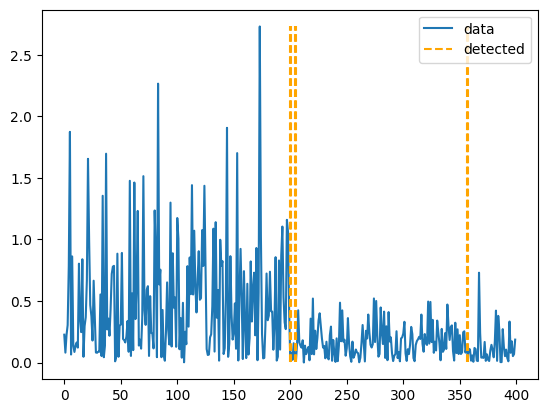

Located change points: (200;201;204;205;356;357)
Computation time (sec): 0.24


In [9]:
# Constants
# Threshold for statistic to overcome to be change point. Should be less than 1.
THRESHOLD = 0.5
# Size of sample that CPD algorithm considers at a time.
WINDOW_SIZE = 48
# Movement coefficient for calculating number of new elements for consideration each time the window moves forward.
SHIFT_FACTOR = 0.5
# Indentation from window borders not to consider points close to the borders of the window, because they are always change points.
# Calculated this way: (1 - MOVEMENT_COEFF) / 2 
INDENT_COEFF = 0.25
# Limit of change points to be detected.
CHANGE_POINT_NUMBER = 20

# Creating instance of SVM classifier.
svm_classifier = SVMClassifier()
# Creating instance of quality metric.
quality_metric = MCC()
# Creating instance of statistical criterion.
statistic = ThresholdOvercome(THRESHOLD)

# Creating instance of classification based CPD algorithm, parameterized by components mentioned above.
classification_based_cpd = ClassificationAlgorithm(svm_classifier, quality_metric, statistic, INDENT_COEFF)
# Configuring scrubber
data_provider = LabeledDataProvider(LabeledCpdData(data,expected_change_points))
scrubber = LinearScrubber(data_provider, WINDOW_SIZE, SHIFT_FACTOR)
# Creating CPD solver, parameterized by offline data and classification based CPD algorithm.
cpd = CpdSolver(CpdProblem(), algorithm=classification_based_cpd, algorithm_input=scrubber)

# Running CPD algorithm.
result = cpd.run()
# Making a plot, visualizing the input time series and the detected change points.
result.visualize(True)
print(result)